In [ ]:
# ---------------------------------------------------- Cours TensorFlow 
# ------------------------------------------- Module 1: Introduction à TensorFlow 



# ---------------------------------------------- cree des constantes 
import tensorflow as tf

# Définition de la première constante valant 5
x1 = tf.constant(5)

# Définition de la deuxième constante valant 10
x2 = tf.constant(10)

print(x1) # Affiche la constante numéro 1

print(x2) # Affiche la constante numéro 2



# ---------------------------------------------- Opérations (voir cell si dessous )

# Appel de la fonction add pour additionner x1 et x2
resultat = tf.add(x1, x2)
# Equivalent :
# resultat = x1 + x2

# Affichage du résultat
print(resultat)

resultat.numpy()



# ---------------------------------------------- Problème 2 : Fonction  f(x) simple 

# Instanciation d'une Variable de valeur initiale 3.0 (donc de type flottant)
x = tf.Variable(initial_value=3.0)

def f(x):
    # Création de "two" via un objet de type constant
    two = tf.constant(2.0, dtype=tf.float32)
    # Equivalent :
    # two = 2.0

    # Application d'un bloc with afin de définir une sous-boîte via la fonction name_scope appliquée à 'Function'
    with tf.name_scope('Function'):
        f_x = x*x - 2*x + two
        
    return f_x

# Evaluation de f(3)
f(x).numpy()



# ---------------------------------------------- methode assign()
#La méthode assign permet d'assigner une nouvelle valeur à la variable.

x.assign(4.0)
f(x).numpy()




# ---------------------------------------------- Calcul de gradient
x.assign(4.0)
# Compute f(4)
with tf.GradientTape() as tape:
    function = f(x)

# Compute gradient of f(4)
grad = tape.gradient(function, x)
print(grad.numpy())


#en calcul analytique  ∂f(x)/dx pour x = 4.

# gradient_f = 2*x-2
print('Gradient of f for x=4 :', 2*4-2)




# ---------------------------------------------- Problème de régression : Régression Linéaire

#ci dessous un exemple d un modele lineaire

%matplotlib inline
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise=10,
                       random_state=0)

X = np.squeeze(X)
# plot data 
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our dataset')
# display plot
print('Shape of X :', X.shape)
print('Shape of y :', y.shape)
plt.show()


#----------------------------------------------affiche la droite de régression
from interaction_intro import show_linear
show_linear(X, y)



#---------------------------------------------- MSE
from interaction_intro import show_MSE
show_MSE(X,y)


# ---------------------------------------------- creer une classe lineaire 
class Linear():
    def __init__(self):
        self.w = tf.Variable(tf.random.normal([1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')
        
    def __call__(self, inputs):
        return inputs * self.w + self.b

    

# ----------------------------------------------Entraînement


#graphe descente de gradient 

from interaction_intro import show_optimization
# Loss function
def f(w):
    w = w/5
    return w**4 + w**3 - 6*w**2 + 1 

# Gardient of the loss function
def f_gradient(w):
    w = w/5
    return 4*(w**3) + 3*(w)**2 - 12*w

# Show the interaction
show_optimization(f, f_gradient)


# ----------------------------------------------  objet model de la classe Linear

# Définition du modèle
model = Linear()

# Définition d'un optimisateur Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

#definition d une fonction d entrainement 
def train_op(model, inputs, targets):
    with tf.GradientTape() as tape:
        # Prédiction de notre modèle
        y_pred = model(inputs)
        # Calcule de l'erreur de notre modèle
        loss_value = tf.keras.losses.mean_squared_error(targets, y_pred)
    # Calculer le gradient de la fonction de perte
    grads = tape.gradient(loss_value, [model.w, model.b])
    # Descente de gradient
    optimizer.apply_gradients(zip(grads, [model.w, model.b]))
    # Retourner la valeur de la fonction de perte
    return loss_value.numpy()

steps = 1000
# Entraînenement du modèle
grads = [train_op(model, X, y) for i in range(steps)]



# ----------------------------------------------Évalutation
# Prédiction de notre modèle
y_pred = model(X)

# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(grads)
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(X, y, alpha=0.5, label = 'True value')

# Afficher la prédiction de X.
plt.plot(X, y_pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.xlabel('y')
plt.title('Prédiction')
plt.legend()
plt.show()



# ----------------------------------------------Modèle Polynomial : Lien entre Tensorflow et Keras

from interaction_intro import show_polynomial
show_polynomial(X, y)


# ----------------------------------------------Créer une classe sous le nom Polynomial

class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation de tf.keras.Model
        super(Polynomial, self).__init__()
        # Instantier la variable w0.
        self.w0 = tf.Variable(tf.random.normal([1]), name='w0')
        
        # Instantier la variable w1.
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')
        
        # Instantier la variable w2.
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')
        
        # Instantier la variable b.
        self.b = tf.Variable(tf.random.normal([1]), name='bias')
        
    def __call__(self, inputs, training=True):
        # Prédiction de notre modèle.
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2*inputs**3
    
    
    
# ---------------------------------------------- utiliser un modele de la plasse polynomial

# Model definiton
model = Polynomial()
# Optimizer
optimizer = tf.keras.optimizers.Adam(1e-1)
# Compilation
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Training
training_history = model.fit(X, y, batch_size=16, epochs=100)



# ---------------------------------------------- graph évolution de loss en fonction de l'itéraction
# Prédiction de notre modèle
y_pred = model(np.linspace(-2.5, 2.5, 100))

# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(X, y, alpha=0.5, label = 'True value')
# Afficher la prédiction de X.
plt.plot(np.linspace(-2.5, 2.5, 100), y_pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()


Ce qu'il faut retenir : 

Tensor
Le tensor est l'unité centrale de données dans tensorflow. C'est comme un tableau numpy, nous pouvons le concevoir comme l'abstraction à n dimensions des matrices.

Opération
Les tenseurs sont transmis aux opérations qui effectuent des calculs sur eux. Les opérations peuvent prendre plusieurs tenseurs en entrée, effectuent des opérations (addition, ...) et peuvent retourner plusieurs tenseurs. Quelques fonctions faisant le parallèle entre les opérateurs numpy et tensorflow :

Fonction Numpy	Fonction Tensorflow
np.matmul	tf.matmul
np.transpose	tf.transpose
np.linalg.inv	tf.linalg.inv
np.cos	tf.cos
np.sin	tf.sin
np.tan	tf.tan
np.log	tf.log
np.exp	tf.exp
np.reshape	tf.reshape
np.concatenate	tf.concat
np.expand_dims	tf.expand_dims
np.arange	tf.range
Graphe
Les tensors et les opérations sont reliés entre eux dans un graphe de calcul. Un graphe de calcul est défini en considérant les opérations comme des nœuds et les tenseurs comme des arêtes.

Eager Execution :
Une des grandes particularités de la version 2.0+ de tensorflow est la mise en place du "eager execution". Le "Eager execution" ou l'exécution rapide consiste à évaluer les opérations immédiatement. Les opérations renvoient des valeurs concrètes au lieu de créer un graphique de calcul à exécuter ultérieurement.

Gradient / Optimisation
Tensorflow permet de calculer les propriétés d'une fonction comme sa primitive ou sa dérivée. Il rend également possible la propagation d'une erreur de la sortie du graphique vers l'entrée (backpropagation). Cette propriété est la base des méthodes d'optimisations en Deep Learning.


Fonction Numpy	Fonction Tensorflow
np.add or +	tf.add or +

np.subtract or -	tf.subtract or -

np.matmul	tf.matmul

np.transpose	tf.transpose

np.linalg.inv	tf.linalg.inv

np.cos	tf.cos

np.sin	tf.sin

np.tan	tf.tan

np.log	tf.log

np.exp	tf.exp

np.reshape	tf.reshape

np.concatenate	tf.concat

np.expand_dims	tf.expand_dims

np.arange	tf.range

In [ ]:
# ---------------------------------------------------- Cours TensorFlow 
# ------------------------------------------- Module 2: Relation entre Tensorflow et Keras


# ----------------------------------------------charger et visualiser le jeu de données MNIST

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = load_data()

# Show 10 randoms numbers.
j = 1
plt.figure(figsize=(14, 5))
for i in np.random.randint(low=0, high=len(X_train), size=[10]):
    plt.subplot(2, 5, j)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Number ' + str(y_train[i]))
    j+=1

# Reshape
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)




# ---------------------------------------------- Tensorflow et Keras
#tf construit autour le framework keras 




# ---------------------------------------------- Modele + couches Denses
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Sequential
model = tf.keras.Sequential()
# Hidden layer 1
model.add(Dense(128, activation='sigmoid', input_shape=[28*28]))
# Outplut Layer
model.add(Dense(10, activation='softmax'))

# ---------------------------------------------- Compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ----------------------------------------------fit 

history = model.fit(X_train, y_train,                        # Training dataset
                        epochs = 20,                         # Number of epochs
                        batch_size = 64,                     # Len of batch
                        validation_data=(X_test, y_test))    # Validation dataset



# ---------------------------------------------- Courbe de la fonction de coût et de précision en fonction de l'epoch

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()



# ---------------------------------------------- Dataset avec Tensorflow

# Change the shape and type
X_train = tf.cast(tf.reshape(X_train, [-1,28,28,1]), tf.float32)
X_test = tf.cast(tf.reshape(X_test, [-1,28,28,1]), tf.float32)

# Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(20000).batch(64)



# ----------------------------------------------

for (X_b, y_b) in dataset.take(5):
    print('Target elements of the batch :', y_b.numpy(), '\n')
    
    

# ---------------------------------------------- les convolutions

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

lenet = tf.keras.Sequential()

lenet.add(Conv2D(filters = 30,                   # Number of output filters
                kernel_size = (5, 5),            # Kernel shape
                input_shape = (28, 28, 1),       # Input shapeD
                activation = 'relu'))            # Activation function

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Conv2D(filters = 16,                    
                kernel_size = (3, 3),
                activation = 'relu'))

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Flatten())

lenet.add(Dropout(rate = 0.2))

lenet.add(Dense(units = 128, activation = 'relu'))

lenet.add(Dense(units = 10, activation = 'softmax'))

lenet.summary()



# ----------------------------------------------Fonction d'entraînement

# Define Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training function
def train_op(model, inputs, targets):
    with tf.GradientTape() as tape:
        # model prediction
        y_pred = model(inputs, training=True)
        # compute the loss function
        loss_value = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(targets, y_pred))
        
    # Compute the gradient of loss function
    grads = tape.gradient(loss_value, model.trainable_variables)
    # Gradient descent
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Return the loss function value
    return loss_value.numpy()



# ---------------------------------------------- le temps d'entraînement.
import time
grads = []
epochs = 10
t0 = time.time()

# Entraînenement du modèle
for i in range(epochs): 
    # Pour chaque epoch
    for X_t, y_t in dataset:
        #Entraîner le modèle pour chaque batch
        train_op(lenet, X_t, y_t)
        
    # Fonction de coût pour l'ensemble de validation
    loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_test, lenet(X_test))).numpy()
    print('Iteration', i, ' Loss', loss)
    grads.append(loss)
    
print('Time :', time.time() - t0)

# Or
# lenet.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lenet.fit(dataset, batch_size=64, epochs=10)

import matplotlib.pyplot as plt
# Afficher l'évolution de la fonction de perte
plt.plot(grads)
plt.xlabel('Epoch')
plt.title('Valeur de la fonction de perte')
plt.show()



# ---------------------------------------------- Évalutation

# CPU device
with tf.device('/CPU:0'):
    # Probability prediction
    y_prob = lenet(X_test)

# Label prediction
y_pred = tf.argmax(y_prob, axis=1).numpy()



# ----------------------------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy :', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)



# Ce qu'il faut retenir :


Les réseaux de neurones organisés en couches sont des outils de machine learning désormais accessibles offrant des résultats pouvant surpasser de loin les algorithmes classiques sur des tâches complexes.

Tensorflow une bibliothèque de référence pour effectuer du deep learning. La version de tensorflow 2.0+ a été construite autour du framework keras.


Globalement, le schéma est le même que pour beaucoup d'algorithmes classiques:

1 - Définir un Dataset pour mettre en forme les données et le partitionner en batchs.

2 - Construire le modèle.

3 - Entraîner le modèle, nous avons vue deux manières équivalentes de le faire:
Méthode fit: problème simple.
Calculer le gradient de la fonction de coût puis rétropropager l'erreur: problème complexe.

4 - Prédiction du modèle


In [ ]:
# ---------------------------------------------------- Cours TensorFlow 
# ------------------------------------------- Module 3: Word Embedding : Word2Vec 


# ----------------------------------------------One hot Encoding

# Import tensorflow
import tensorflow as tf
# Dictionary
dictionary = {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
# One hot representation of "think"
tf.one_hot(dictionary['think'], 4).numpy()

# Distance : √2




# ----------------------------------------------Word2Vec

# ----------------------------------------------import file

file = open("book.txt", "r",encoding='utf-8') 
text = file.read()
file.close()
# ---------------------------------------------- Définition du dictionnaire 

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords

#Choice only useful words to create the dictionary :
tokenizer = RegexpTokenizer("[a-zA-Zé]{2,}")
word_list = tokenizer.tokenize(text.lower())

stop_word = stopwords.words('english')
filtered_words = [word for word in word_list if word not in stop_word]

vectorizer = CountVectorizer()
vectorizer.fit(filtered_words);

# ---------------------------------------------- word2idx 
#Define the dictionary
word2idx = vectorizer.vocabulary_
idx2word = dict(zip(word2idx.values(),word2idx.keys()))
vocab_size = len(idx2word)


# ----------------------------------------------Model Skip-Gram

#Run the program
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords

def sentenceToData(tokens,WINDOW_SIZE):
    window = np.concatenate((np.arange(-WINDOW_SIZE,0),np.arange(1,WINDOW_SIZE+1)))
    X,Y=([],[])
    for word_index, word in enumerate(tokens) :
        if ((word_index - WINDOW_SIZE >= 0) and (word_index + WINDOW_SIZE <= len(tokens) - 1)) :
            X.append(word2idx[word])
            Y.append([word2idx[tokens[word_index-i]] for i in window])
    return X, Y

stop_word = stopwords.words('english')
WINDOW_SIZE = 5

X, Y = ([], [])
for sentence in text.lower().split("."):
    word_list = tokenizer.tokenize(sentence)
    filtered_words = [word for word in word_list if word not in stop_word]
    X1, Y1 = sentenceToData(filtered_words, WINDOW_SIZE//2)
    X.extend(X1)
    Y.extend(Y1)
    
X = np.array(X).astype(int).reshape([-1,1])
y = np.array(Y).astype(int)
print('Shape of X :', X.shape)
print('Shape of Y :', y.shape)

# ----------------------------------------------
class Word2vec(tf.keras.Model):
    def __init__(self, N_DIM):
        super(Word2vec, self).__init__()
        self.W1 = tf.Variable(tf.random.uniform([vocab_size, N_DIM],-1.0, 1.0))
        self.W2 = tf.Variable(tf.random.uniform([N_DIM, vocab_size],-1.0, 1.0))
                   
    def __call__(self, X, training=True):
        X = tf.one_hot(X, depth=vocab_size, axis=-1)
        X = tf.squeeze(X, axis=1)
        h = tf.linalg.matmul(X, self.W1)
        u = tf.linalg.matmul(h, self.W2)
        return u
# ----------------------------------------------

batch_size = 64
def loss(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.int32)
    y_true = tf.one_hot(y_true, depth=vocab_size)
    return -tf.tensordot(y_pred, tf.reduce_sum(y_true, axis=[1]),2)/batch_size + tf.reduce_sum(4*tf.math.log(tf.reduce_sum(tf.exp(y_pred), axis=[1])))/batch_size


# ---------------------------------------------- Entraînement

from tensorflow.keras.optimizers import Adam
word2vec = Word2vec(100)
optimizer = Adam(learning_rate=0.01)

# ---------------------------------------------- compile + fit

batch_size = 64

# Compile le modèle
word2vec.compile(optimizer=optimizer, loss=loss)
# Entraîner le modèle sur 20 epoch
word2vec.fit(X, y, batch_size=batch_size, epochs=20)


# ----------------------------------------------

batch_size = 64

# Définition d'un optimisateur Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile le modèle
word2vec.compile(optimizer=optimizer, loss=loss)

# Entraîner le modèle sur 20 epoch
word2vec.fit(X, y, epochs=20, batch_size=batch_size)



# ---------------------------------------------- Extraire la représentation matricielle 
from sklearn.preprocessing import Normalizer
vectors = word2vec.W1.numpy()
normalizer = Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')




# ---------------------------------------------- Métrique dans l'espace word2vec

## Run the program

def dot_product(vec1, vec2):
    return np.sum((vec1*vec2))

def cosine_similarity(vec1, vec2):
    return dot_product(vec1, vec2)/np.sqrt(dot_product(vec1, vec1)*dot_product(vec2, vec2))

def find_closest(word_index, vectors, number_closest):
    list1=[]
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def compare(index_word1,index_word2,index_word3,vectors,number_closest):
    list1=[]
    query_vector = vectors[index_word1]-vectors[index_word2]+vectors[index_word3]
    normalizer = Normalizer()
    query_vector =  normalizer.fit_transform([query_vector], 'l2')
    query_vector= query_vector[0]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def print_closest(word, number=10):
    index_closest_words = find_closest(word2idx[word], vectors, number)
    for index_word in index_closest_words :
        print(idx2word[index_word[1]]," -- ",index_word[0])
        

        
# ----------------------------------------------Propriétés arithmétiques
index_compare_words = compare(word2idx['king'], word2idx['man'], word2idx['woman'], vectors,10)
for index_word in index_compare_words :
    print(idx2word[index_word[1]], " -- ", index_word[0])
    
    
# ---------------------------------------------- trouver le vecteur définissant le sexe d'un mot
## Run the program.
from sklearn.decomposition import PCA

pairs = [('woman', 'man'),
('sister', 'brother'),
('daughter', 'son'),
('mother', 'father'),
('girl', 'boy'),
('queen', 'king')]

n=np.shape(pairs)[0]
difference_matrix = np.array([vectors[word2idx[a[0]]]-vectors[word2idx[a[1]]] for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[vectors[word2idx[word]] for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)
normalizer = Normalizer()
coord =  normalizer.fit_transform(coord, 'l2')
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize=(12,12))

for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))

for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])

plt.show()



# ---------------------------------------------- Modèle pré-entrainé
import gensim.downloader as api
print(api.info())
# ----------------------------------------------model
model = api.load("glove-wiki-gigaword-200")

# ----------------------------------------------ficher les mots plus similaire de "king"
model.most_similar("eye")

# ---------------------------------------------- mots les plus proches de  King−Man+WomanKing−Man+Woman  avec la méthode most_similar
model.most_similar(positive=['king', 'woman'], negative=['man'])


# ----------------------------------------------trouver la dimension définissant le genre
## Run the program.
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pairs = [('she', 'he'),
('her', 'his'),
('woman', 'man'),
('sister', 'brother'),
('herself', 'himself'),
('daughter', 'son'),
('mother', 'father'),
('girl', 'boy'),
('queen', 'king')]

n = np.shape(pairs)[0]

difference_matrix = np.array([model.word_vec(a[0], use_norm=True)-model.word_vec(a[1], use_norm=True) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model.word_vec(word, use_norm=True) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12,12))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show()



### Conclusion ¶
Le "word2vec embedding" capture efficacement les propriétés sémantiques et arithmetiques d'un mot. Il permet également de réduire la dimension du problème de tâche d'apprentissage.

La fonction embedding_lookup de tensorflow.nn permet à l'index d'un mot d'appliquer un embedding défini en argument. Les mots inconnus sont randomisés dans la matrice word2vec.

Dans l'ensemble, nous espérons que cela vous a montré comment TensorFlow vous offre une grande flexibilitée dans l'implémentation de vos modèles.

In [ ]:
# ---------------------------------------------------- Cours TensorFlow 
# ------------------------------------------- Module 4: RNN : Générer du texte 

# ----------------------------------------------  fonctionnement d'un RNN

from interaction_rnn import show_rnn
show_rnn()


# ----------------------------------------------

file = open("shakespeare.txt", "r", encoding='utf-8') 
text = file.read()
file.close()
print(text[:250])


# ----------------------------------------------

vocab = sorted(set(text))
print('{} uniques characters'.format(len(vocab)))

# ---------------------------------------------- Convertir en index
import numpy as np
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

print('{')
for char, _ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')



# ---------------------------------------------- Génération du Dataset
import tensorflow as tf
seq_length = 100

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
    print(idx2char[i.numpy()])

    
# ----------------------------------------------découper le jeu de données en batch de longueur seq_length + 1.

sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
    print(repr(''.join(idx2char[item.numpy()])))
    
    
    
# ---------------------------------------------- séparer les données d'entrées et les données cibles
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

for input_example, target_example in  dataset.take(1):
    print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))
    
    

# ----------------------------------------------shuffle 

batch_size = 64
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)



# ----------------------------------------------RNN 
from tensorflow.keras.layers import Lambda, RNN, GRU, GRUCell, Dense

# Length of the vocabulary in chars
vocab_size = len(vocab)

def build_model(batch_size):

    model = tf.keras.Sequential()

    model.add(Lambda(lambda x: tf.one_hot(tf.cast(x, tf.int32), depth=vocab_size), batch_input_shape=[batch_size, None])) # Add one_hot layer

    model.add(RNN(GRUCell(512), # Cell of RNN
                return_sequences=True, # return a sequence
                stateful=True))

    model.add(Dense(vocab_size))
    
    return model



# ---------------------------------------------- fonction loss 
def loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)


# ---------------------------------------------- cree 1 modele + compile

# Create model
model = build_model(64)
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss=loss)



# ---------------------------------------------- fit
model.fit(dataset, epochs=10)


# ----------------------------------------------Diminuer le learning rate à 1e-3

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=loss)
model.fit(dataset, epochs=15)




# ---------------------------------------------- gestion des poids 

# Save weights
model.save_weights('model_rnn')
# Create a new model with a batch_size of 1.
model = build_model(1)
# Load weights
model.load_weights('model_rnn')




# ----------------------------------------------générer du texte
def generate_text(model, start_string, num_generate = 500):
    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    # Reset initial state
    model.reset_states()
    for i in range(num_generate):
        # Probability prediction
        prediction = tf.nn.softmax(model(input_eval), axis=-1)
        # Index prediction
        index = tf.argmax(prediction, axis=-1).numpy()[0]
        input_eval = tf.expand_dims([index[-1]], 0)
        # Save letter in text_generated list
        text_generated.append(idx2char[index[-1]])
    return (start_string + ''.join(text_generated))



# ----------------------------------------------generer un mot
print(generate_text(model, start_string="ROMEO: "))




# ----------------------------------------------Charger les poids entraînés

model = build_model(1)
model.load_weights('./weights/gru_model')



# ----------------------------------------------Afficher le texte généré
print(generate_text(model, start_string="ROMEO: "))

### Conclusion
Dans l'ensemble de l'exercice, vous avez formé un réseau de neurones pour générer du texte. Même si la longueur du texte que nous échantillonnons est assez petite, nous pouvons néanmoins remarquer certaines caractéristiques intéressantes du texte généré. Par exemple, le réseau apprend quelques mots de base comme «and», «of» «you» et «could» assez rapidement dans la formation. En outre, il apprend également quelques règles grammaticales de base: mettre des majuscules au premier mot de la phrase, finir une phrase par de la ponctuation, poser des questions fonctionne si les phrases commencent par des mots comme «what», «where». Le système n'est pas parfait mais étant donné que nous avons alimenté le réseau en caractères simples, il est remarquable que le réseau soit capable d'apprendre ces dépendances à long terme.

Cet exercice est assez différent des exercices précédents car nous n'avons pas classé ou appris certaines fonctionnalités à partir de données. Les réseaux de neurones sont utiles non seulement pour classer les données mais aussi pour générer des données.

Le taux d'apprentissage est très important pendant la formation. Si nous avons un taux d'apprentissage très élevé au début, nous pourrions rester coincés dans certains minima locaux pas vraiment représentatifs. Trop bas et l'entraînement devient lent.

In [ ]:
# ---------------------------------------------------- Cours TensorFlow 
# ------------------------------------------- Module 5 : Generative Adversarial Networks (GAN)



# ----------------------------------------------Créer des personnages animés
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

list_imgs = os.listdir('images')
X = []
k=0
for i, l in enumerate(list_imgs[:1000]):
    # Load image
    img = plt.imread('./images/'+l)
    # Remove low resolution image
    if img.shape[0]<50 or img.shape[1]<50:
        k=k+1
        continue
    # Remove gray images
    if len(img.shape)!=3:
        continue
    # Resize image    
    img = cv2.resize(img, (64, 64))
    X.append(img)

X = np.array(X)
print('Shape of X :', X.shape)



# ---------------------------------------------- affichez des images de notre datasets
j = 1
plt.figure(figsize=(15,7))
for i in np.random.randint(low=0, high=len(X), size=[8]):
    plt.subplot(2,4,j)
    plt.imshow(X[i])
    j += 1
    

#Créer un dataset de X à l'aide de la fonction from_tensor_slices de tf.data.Dataset.
# ----------------------------------------------

import tensorflow as tf
# Dataset
dataset = tf.data.Dataset.from_tensor_slices((X))
# Map function
def fn_map(x):
    return x/255
# Transformations
dataset = dataset.shuffle(10000).map(fn_map).batch(32, drop_remainder=True)



# ---------------------------------------------- Modèle Génératif

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Flatten, Reshape, Dense
from tensorflow.keras.optimizers import Adam

# define the standalone generator model
def define_generator(noise_len):
    model = tf.keras.Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=noise_len))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    # upsample to 16x16
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 32x32
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 64x64
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (7,7), activation='sigmoid', padding='same'))
    return model



# ---------------------------------------------- fonction generate input noise et generate fake sample 


from numpy import zeros
from numpy.random import randn
import matplotlib.pyplot as plt

# generate points in latent space as input for the generator
def generate_inputs_noise(noise_len, n_samples):
    # generate points in the latent space
    x_input = randn(noise_len * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, noise_len)
    return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, noise_len, n_samples):
    # generate points in latent space
    x_input = generate_inputs_noise(noise_len, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y



# ----------------------------------------------  modèle générateur sous le nom model  
# size of the latent space
noise_len = 100
# define the discriminator model
model = define_generator(noise_len)
# generate samples
n_samples = 8
X_sample, _ = generate_fake_samples(model, noise_len, n_samples)

# plot the generated samples
plt.figure(figsize=(15, 7))
for i in range(n_samples):
    # define subplot
    plt.subplot(2, 4, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(X_sample[i])
    
# show the figure
plt.show()



# ----------------------------------------------define_discriminator 

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Flatten, Reshape, Dense
from tensorflow.keras.optimizers import Adam

# define the standalone discriminator model
def define_discriminator(input_shape=(64,64,3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(256, (3,3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model


# ---------------------------------------------- Modèle GAN

def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = tf.keras.Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 
# size of the latent space
noise_len = 100
# create the discriminator
d_model = define_discriminator()
d_model.trainable = False
# create the generator
g_model = define_generator(noise_len)
# create the gan
gan_model = define_gan(g_model, d_model)



# ----------------------------------------------Retourner d_loss et g_loss.

from numpy import vstack, ones
batch_size = 64
half_batch = int(batch_size/2)

def train_op(X_real):
    # get randomly selected 'real' samples
    y_real = np.ones([half_batch, 1])
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(g_model, noise_len, half_batch) 
    # create training set for the discriminator
    X_discriminator, y_discriminator = vstack((X_real, X_fake)), vstack((y_real, y_fake))
    # update discriminator model weights
    d_loss = d_model.train_on_batch(X_discriminator, y_discriminator)
    
    # prepare points in latent space as input for the generator
    X_gan = generate_inputs_noise(noise_len, batch_size)
    # create inverted labels for the fake samples
    y_gan = ones((batch_size, 1))
    # update the generator via the discriminator's error
    g_loss = gan_model.train_on_batch(X_gan, y_gan)
    # summarize loss on this batch
    return d_loss, g_loss
    print('>%d, %d/, d=%.3f, g=%.3f' % (i+1, j+1, d_loss, g_loss))
    
    


# ---------------------------------------------- Entraîner le modèle sur 10 epochs et afficher à chaque itération

n_epochs = 10
half_batch = int(batch_size/2)
for i in range(n_epochs):
    # enumerate batches over the training set
    for j, X_real in enumerate(dataset):
        # Training model
        d_loss, g_loss = train_op(X_real)
        # Print loss
        print('> Epoch %d, Batch %d, d_loss=%.3f, g_loss=%.3f' % (i+1, j+1, d_loss, g_loss))
        
        
        
# ---------------------------------------------- afficher des images générées par notre modèle

noise_len
n_samples = 8
X, _ = generate_fake_samples(g_model, noise_len, n_samples)

# plot the generated samples
plt.figure(figsize=(15, 7))
for i in range(n_samples):
    # define subplot
    plt.subplot(2, 4, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(X[i], cmap='gray_r')
# show the figure
plt.show()


# ---------------------------------------------- Charger les poids entraînés sur plus de 200000 itérations du modèle gan_model


gan_model.load_weights('./weights/gan_model')


#afficher des images générées par notre modèle avec les nouveaux poid
# ----------------------------------------------

n_samples = 8
noise_len = 100
X, _ = generate_fake_samples(g_model, noise_len, n_samples)

# plot the generated samples
plt.figure(figsize=(15, 7))
for i in range(n_samples):
    # define subplot
    plt.subplot(2, 4, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(X[i], cmap='gray_r')
# show the figure
plt.show()


# ---------------------------------------------- generer des new images
x_input = np.zeros([8, 100])
x_input[:,0]=np.linspace(0, 5, 8)
x_input[:,1]=np.linspace(0, 3, 8)
X = g_model.predict(x_input)

# plot the generated samples
plt.figure(figsize=(15, 7))
for i in range(n_samples):
    # define subplot
    plt.subplot(2, 4, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(X[i], cmap='gray_r')
# show the figure
plt.show()


Vous avez pu générer de nouvelles images en opposant un réseau de neurones à un autre. Cependant, il est difficile de comprendre l'influence de chaque dimension du vecteur d'entrée sur les caractéristiques du personnage.

Dans l'ensemble, nous espérons que cela vous a montré comment TensorFlow vous offre une grande flexibilité dans l'implémentation de vos modèles.

Ce qu'il faut retenir :
Les réseaux de neurones organisés en couches sont des outils de machine learning désormais accessibles offrant des résultats pouvant surpasser de loin les algorithmes classiques sur des tâches complexes.

Tensorflow une bibliothèque de référence pour effectuer du deep learning. La version de tensorflow 2.0+ a été construite autour du framework keras.

Globalement, le schéma est le même que pour beaucoup d'algorithmes classiques:

Mise en forme des données.
Définir un Dataset et partitionner le en batch.
Construction du modèle.
Entraîner le modèle, nous avons vue trois manières équivalentes de le faire:
Méthode fit: problème simple.
Méthode train_on_batch: pour entraîner itération par itération.
Calculer le gradient de la fonction puis rétropropager l'erreur: problème complexe.
Comme nous l'avons vu dans l'ensemble du module, un paramètre crucial est le taux d'apprentissage. Dans cet exercice, nous avons défini le même taux d'apprentissage pour les deux réseaux. Nous aurions pu jouer sur les taux d'apprentissages pour les deux réseaux pour gagner en efficacité.

Dans l'ensemble, nous espérons que cela vous a montré comment TensorFlow vous offre une grande flexibilité dans l'implémentation de vos modèles.



Bravo ! Vous êtes arrivé à la fin de la formation de Tensorflow. N'hésitez pas à nous faire part de vos retours pour l'amélioration de nos formations.

Dans cet examen, nous allons tester vos connaissances sur les idées et concepts de base de Tensorflow. Suite à un exercice court sur un problème d'optimisation, nous testerons ensuite votre capacité à implémenter un réseau de neurones et une métrique pour un problème de régression.

L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables. N'hésitez pas à contacter l'équipe DataScientest si vous rencontrez des problèmes sur help@datascientest.com.

Exercice: Warm Up!
Soit  f(x)=exp(x−2)+15x²+50x+1

L'objectif de cet exercice est de trouver la valeur x qui minimise la fonction f.

Afficher la courbe de la fonction f entre [-5, 5]
Trouver graphiquement la valeur approximative x qui minimise la fonction f.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:

x = tf.Variable (3.0)

#fonction f(x)=exp(x−2)+15x²+50x+1
def f(x):
    # Création de "two" via un objet de type constant
    one = tf.constant(1.0, dtype=tf.float32)
    
    # Application d'un bloc with afin de définir une sous-boîte via la fonction name_scope appliquée à 'Function'
    with tf.name_scope('Function'):
        f_x = tf.exp ( x - 2 ) + (15* x**2 )+ (50 * x) + one

    return f_x


f(x).numpy()

288.71826

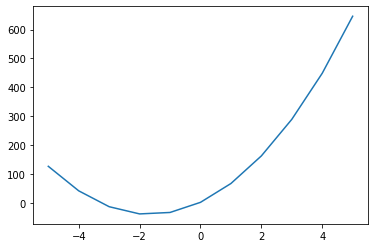

In [4]:
liste_x = [-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0  ]
liste_y = []

for i in liste_x : 

    liste_y.append (f(i).numpy())

liste_y
plt.plot (liste_x,liste_y)

#entre -2 et -1

Comme ∂f(x)/∂x=0 n'admet pas de solution explicite, trouver la valeur numérique x qui minimise la fonction f en utilisant des descentes de gradient. Est-ce que la solution est cohéremnte avec la solution trouvée graphiquement ?

In [11]:
def f_p(x):
    e0_p = tf.exp ( tf.subtract ( tf.Variable( x ) , tf.constant ( 2.0,dtype=tf.float32 ) ))       
    e1_p = tf.Variable ( tf.constant (30.0,dtype=tf.float32) * tf.Variable(x))
    e2_p = tf.constant (50.0,dtype=tf.float32) 
  
    return  e0_p.numpy() + e1_p.numpy() + e2_p.numpy()



pour x =  -5.0
-99.999084
pour x =  -4.0
-69.99752
pour x =  -3.0
-39.993263
pour x =  -2.0
-9.981686
pour x =  -1.0
20.049788
pour x =  0.0
50.135334
pour x =  1.0
80.36788
pour x =  2.0
111.0
pour x =  3.0
142.71829
pour x =  4.0
177.38905
pour x =  5.0
220.08554


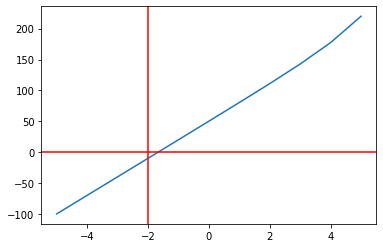

In [63]:
y_p = []

for i in liste_x : 
    print ('pour x = ',i)
    print (f_p(i))
    y_p.append (f_p(i))
    
plt.plot (liste_x,y_p)
plt.axhline(0,c ='red')
plt.axvline(-2,c ='red')
plt.show();

#oui c est coherent car = 0 entre -2 - 1

In [ ]:
liste_x = [-5.0 , -4.0 , -3.0 , -2.0 , -1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0 ,5.0  ]


#for i in range (-5,6):
#    x.assign( float (i))
#    with tf.GradientTape() as tape:
#        function = f(x)
        
#    grad = tape.gradient(function, x)
#    print ('x=',i)
#    print(grad.numpy())

Afficher la valeur du gradient en cette valeur.

Est-ce que la valeur du gradient est cohérente ?

In [53]:
f_p (-1.668)

#ok 

-0.014472961

In [ ]:
#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1

class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation de tf.keras.Model
        super(Polynomial, self).__init__()
        # Instantier la variable w0.
        self.w0 = tf.Variable(tf.random.normal([1]), name='w0')
        
        # Instantier la variable w1.
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')
        
        # Instantier la variable w2.
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')
               
        # Instantier la variable b.
        self.b = tf.Variable(tf.random.normal([1]), name='bias')
        
    def __call__(self, inputs, training=True):
        # Prédiction de notre modèle.
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2* tf.exp (inputs)

In [ ]:
import tensorflow as tf
import numpy as np

def f(x):
    e0 = tf.exp ( tf.subtract ( tf.Variable(x) , tf.constant (2.0,dtype=tf.float32) , name='e0' ))       
    e1 = tf.Variable ( tf.constant (15.0,dtype=tf.float32) * tf.Variable(x)**2, name='e1')
    e2 = tf.Variable( tf.constant (50.0,dtype=tf.float32) * tf.Variable(x), name='e2')
    b =  tf.constant (1.0,dtype=tf.float32, name='b')
    return b + e0 + e1 + e2

import matplotlib.pyplot as plt


f([5.0,1.0] ).numpy()

In [ ]:
x = tf.Variable (3.0)

#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1
def f(x):
    # Création de "two" via un objet de type constant
    one = tf.constant(1.0, dtype=tf.float32)
    
    # Application d'un bloc with afin de définir une sous-boîte via la fonction name_scope appliquée à 'Function'
    with tf.name_scope('Function'):
        f_x = tf.exp ( x - 2 ) + (15* x**2 )+ (50 * x) + one

    return f_x


f(x).numpy()

In [ ]:
x.assign(4.0)
# Compute f(4)


for i in range (-5,5):
    x.assign( float (i))
    with tf.GradientTape() as tape:
        function = f(x)
        
    grad = tape.gradient(function, x)
    print(grad.numpy())



In [ ]:
#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1

class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation de tf.keras.Model
        super(Polynomial, self).__init__()
        # Instantier la variable w0.
        self.w0 = tf.Variable( 50.0, name='w0')
        
        # Instantier la variable w1.
        self.w1 = tf.Variable(15.0, name='w1')
        
        # Instantier la variable w2.
        self.w2 = tf.Variable(1.0, name='w2')
               
        # Instantier la variable b.
        self.b = tf.constant (1.0, name='bias')
        
    def __call__(self, inputs, training=True):
        # Prédiction de notre modèle.
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2* tf.exp (inputs - 2.0 )

In [ ]:
model = Polynomial()
# Optimizer
optimizer = tf.keras.optimizers.Adam(1e-1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:

training_history = model.fit(x, y, batch_size=16, epochs=10)

In [ ]:
#y_pred = model([-5,2])

pred = []
for i in liste_x : 
    pred.append ( model (i) )
    
plt.plot (liste_x,pred)

In [ ]:
liste_x = [-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0  ]
liste_y = []

for i in liste_x : 

    liste_y.append (f(i).numpy())

liste_y
plt.plot (liste_x,liste_y)

plt.plot (liste_x, pred,'r--')
plt.show();

In [ ]:


# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(liste_x, y, alpha=0.5, label = 'True value')
# Afficher la prédiction de X.
plt.plot(liste_x, pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(X, y, alpha=0.5, label = 'True value')
# Afficher la prédiction de X.
plt.plot(np.linspace(-2.5, 2.5, 100), y_pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()

Comme  ∂f(x)/∂x=0  n'admet pas de solution explicite, trouver la valeur numérique x qui minimise la fonction f en utilisant des descentes de gradient.
Est-ce que la solution est cohérente avec la solution trouvée graphiquement ?

In [ ]:
x = tf.Variable (3.0)
x.assign(2.0)
x


In [ ]:
## Insérez votre code ici
x.assign(0.0)

def f_p(x):
    e0_p = tf.exp ( tf.subtract ( tf.Variable( x ) , tf.constant ( 2.0,dtype=tf.float32 ) ))       
    e1_p = tf.Variable ( tf.constant (30.0,dtype=tf.float32) * tf.Variable(x))
    e2_p = tf.constant (50.0,dtype=tf.float32) 
  
    return  e0_p.numpy() + e1_p.numpy() + e2_p.numpy()

f_p(0.0)

y_p = []


for i in liste_x : 
    print ('pour x = ',i)
    print (f_p(i))
    y_p.append (f_p(i))
    
plt.plot (liste_x,y_p)
plt.show();
#oui variation = 0




Afficher la valeur du gradient en cette valeur.

Est-ce que la valeur du gradient est cohérente ?

In [ ]:
## Insérez votre code ici

f(0.0)


Problème de régression : Détection de la boîte englobant le visage


Dans cet examen, nous allons former un modèle permettant de trouver les coordonnées du rectangle englobant le visage d'une personne. Nous travaillerons sur des images provenant de vidéo YouTube stocké sous forme d'image dans le dossier imgs". Les cordonnées des points à l'extrémité du rectangle englobant le visage sont sous forme de CSV.



Exécuter la cellule suivante pour charger les images dans la variable X.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

X = []
for p in os.listdir('imgs'):
    X.append(plt.imread('imgs/'+p))

X = np.array(X)
print('Shape of X :', X.shape)

Charger le fichier "face_boxe.csv" sous le nom df.

In [ ]:
## Insérez votre code ici
import pandas as pd

df = pd.read_csv ('face_boxe.csv')

df.head()


In [69]:
import numpy as np

feature = np.random.rand (20,4)
feature = pd.DataFrame (feature, columns = ['xmin','xmax','ymin','ymax'])
feature.head()

,xmin,xmax,ymin,ymax
0,0.420237,0.840894,0.749575,0.833809
1,0.244296,0.960838,0.919464,0.835696
2,0.709742,0.533572,0.425805,0.373661
3,0.024793,0.224256,0.919463,0.077241
4,0.401649,0.186513,0.749395,0.627936


In [78]:
#on cree les targets

target = pd.DataFrame ()
target['xmoy'] = (feature['xmin'] + feature['xmax']) / 2
target['ymoy'] = (feature['ymin'] + feature['ymax']) / 2

target['w' ] =  feature['xmax'] - feature['xmin']
target['h'] = feature['ymax'] - feature['ymin']

target.head()

#on separe les ensembles 

int (len (feature) *0.8)  #16

X_train = feature.loc [:16]
X_test = feature.loc [:16]

y_train = target.loc [:16]
y_test = target.loc [:16]


#on applique le tensor

In [94]:
X_train.shape

TensorShape([17, 4])

In [91]:
X_train.shape  #(17, 4)
X_train = tf.cast(tf.reshape(X_train, [17,4]), tf.float64)


dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(20000).batch(64)

In [92]:
for (X_b, y_b) in dataset.take(5):
    print('Target elements of the batch :\n', y_b.numpy(), '\n')

Target elements of the batch :
 [[ 0.63056538  0.79169182  0.42065635  0.08423357]
 [ 0.51722447  0.47115654  0.85966887 -0.00196432]
 [ 0.52309771  0.53199564  0.6599921  -0.93067373]
 [ 0.47566256  0.70403341  0.09980888  0.07267634]
 [ 0.43940866  0.17004619  0.7152352  -0.0678336 ]
 [ 0.45531019  0.61622444 -0.09777505  0.65028961]
 [ 0.52981123  0.48165895 -0.92550752  0.93092085]
 [ 0.29408094  0.68866531 -0.21513643 -0.12145958]
 [ 0.62165734  0.39973309 -0.17616994 -0.05214369]
 [ 0.39306112  0.5662681  -0.58408617 -0.38857316]
 [ 0.12452446  0.49835173  0.1994625  -0.8422223 ]
 [ 0.41104156  0.08034592 -0.64378195  0.03037214]
 [ 0.63470627  0.38022273 -0.46316884 -0.52982159]
 [ 0.34682361  0.61572839 -0.67079767  0.00919909]
 [ 0.602567    0.87758016  0.71654265 -0.08376854]
 [ 0.76326442  0.4712612  -0.27504023  0.6523453 ]
 [ 0.19793878  0.62672877 -0.1515963  -0.17816681]] 



Exécuter la cellule suivante pour afficher des images du jeu de données ainsi que le rectangle englobant le visage correspondant.
   Nous avons choisi d'utiliser la fonction plot de matplotlib.pyplot pour afficher les segments d'un rectangle.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
j=1
for i in np.random.randint(0, len(df), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    img = X[i]
    plt.imshow(img)
    x_min = df.xmin[i]
    x_max = df.xmax[i]
    y_min = df.ymin[i]
    y_max = df.ymax[i]
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], '-b')
    j+=1

Pour localiser une unique boîte encadrant la voiture dans l'image, nous pouvons se ramener à un problème de régression sur 4 variables cibles suivante.



xmoyxmoy  : position horizontale (normalisé) du milieu de la boîte.
ymoyymoy  : position verticale (normalisé) du milieu de la boîte.
w : largeur (normalisé) de la boîte.
h : hauteur (normalisé) de la boîte.
Les valeurs de  xmoyxmoy ,  ymoyymoy , w et h doivent être comprises entre 0 et 1. Il est donc nécessaire de diviser les valeurs de  xmoyxmoy ,  ymoyymoy , w et h par 256.

Mettre en forme les données.

In [ ]:
df = df/256


Séparer le jeu de données en un ensemble d'entraînement et en un ensemble de validation.

In [62]:
train.shape

(14, 4)

In [60]:
train = df[:14]
test = df[14:]

Modèle :

Vous allez maintenant définir un modèle convolutionnel permettant de prédire les valeurs  xmoyxmoy ,  ymoyymoy , w et h en fonction des images en entrée.


En vous inspirant de l'image précédente, définir un modèle convolutionnel permettant d'estimer les paramètres X, Y, w et h.

In [96]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

lenet = tf.keras.Sequential()

lenet.add(Conv2D(filters = 30,                   # Number of output filters
                kernel_size = (5, 5),            # Kernel shape
                input_shape = (1,17, 4, 1),       # Input shapeD
                activation = 'relu'))            # Activation function

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Conv2D(filters = 16,                    
                kernel_size = (3, 3),
                activation = 'relu'))

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Flatten())

lenet.add(Dropout(rate = 0.2))

lenet.add(Dense(units = 128, activation = 'relu'))

lenet.add(Dense(units = 4 , activation = 'softmax'))

lenet.summary()


ValueError: Negative dimension size caused by subtracting 5 from 4 for '{{node conv2d_1/Conv2D/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv2d_1/Conv2D/Reshape, conv2d_1/Conv2D/Conv2D/ReadVariableOp)' with input shapes: [?,17,4,1], [5,5,1,30].

Nous allons utiliser la fonction de coût suivante :

Loss=(xpred−xtrue)2+(ypred−ytrue)2+(|wpred|−wtrue )2+(|hpred|−htrue )2
 
   Astuce : Vous pouvez découper un tensor X en prenant toutes les lignes (:) mais en gardant qu'une colonne spécifique (i) en effectuant l'opéraction X[:, i].
Définir une fonction retournant le résultat de la fonction de coût ci-dessus.

In [ ]:
# Define Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training function
def train_op(model, inputs, targets):
    with tf.GradientTape() as tape:
        # model prediction
        y_pred = model(inputs, training=True)
        # compute the loss function
        loss_value = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(targets, y_pred))
        
    # Compute the gradient of loss function
    grads = tape.gradient(loss_value, model.trainable_variables)
    # Gradient descent
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Return the loss function value
    return loss_value.numpy()

Entraîner votre modèle sur un nombre d'itérations faibles (moins de 5 minutes d'entraînement).

In [ ]:
for i in range(epochs): 
    # Pour chaque epoch
    for X_t, y_t in dataset:
        #Entraîner le modèle pour chaque batch
        train_op(lenet, X_t, y_t)
        
    # Fonction de coût pour l'ensemble de validation
    loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_test, lenet(X_test))).numpy()
    print('Iteration', i, ' Loss', loss)
    grads.append(loss)

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img.

Nous vous rappelons que nous avons entraîné notre modèle que sur peu d'itération ce qui explique de mauvais résultat.

Exécuter la cellule suivante pour charger un modèle entraîné sur ce jeu de données plus de 5 heures.

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img.

In [ ]:
import numpy as np
def show_img(img, x0, y0, w0, h0):
    plt.imshow(img)
    x0 = np.abs(x0)
    y0 = np.abs(y0)
    w0 = np.abs(w0)
    h0 = np.abs(h0)
    x1= (x0-w0/2)*256
    x2= (x0+w0/2)*256
    y1= (y0-h0/2)*256
    y2= (y0+h0/2)*256
    plt.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], "r")
## Insérez votre code ici

...

Nous vous rappelons que nous avons entraîné notre modèle que sur peu d'itération ce qui explique de mauvais résultat.

Exécuter la cellule suivante pour charger un modèle entraîné sur ce jeu de données plus de 5 heures.

In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
model = json_file.read()
json_file.close()
# Load model
model = model_from_json(model)
# Load weights
model.load_weights('./weights/face_detection')

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img.

Avec la fonction url_to_image, vous pouvez charger une image à partir d'un lien URL.

Prédire le rectangle encadrant le visage avec des images sur internet.

In [ ]:
import urllib
import cv2
def url_to_image(url):
    resp = urllib.request.urlopen(url) 
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, -1)
    img = cv2.resize(img[:,:,[2,1,0]], (256, 256))
    return img

## Example :
img = url_to_image("https://starbyface.com/ImgBase/testPhoto/test1.jpg")

## Insérez votre code ici



Évaluation : Intersection over Union (partie optionnelle)¶

Intersection over Union (IoU) est la métrique d'évaluation la plus populaire utilisée dans les tests de référence de détection d'objets. Cependant, il existe un écart entre les optimisations couramment utilisées pour régresser les paramètres d'une boîte englobante et la maximisation de cette métrique.



Nous allons nous intéresser dans cette partie à évaluer notre modèle à l'aide de cette métrique.

Avec :

xA=max(x11,x21)
xA=max(x11,x21)
 
yA=max(y11,y21)
yA=max(y11,y21)
 
xB=min(x12,x22)
xB=min(x12,x22)
 
yB=min(y12,y22)
yB=min(y12,y22)
 
L'air de la zone d'intersection s'écrit :

intersection=max(xB−xA,0)⋅max(yB−yA,0)
Aintersection=max(xB−xA,0)⋅max(yB−yA,0)
 
L'air de la zone d'union s'écrit :

union=1+2−intersection
Aunion=A1+A2−Aintersection
 
C'est-à-dire :

union=(x12−x11)⋅(y12−y11)+(x22−x21)⋅(y22−y21)−intersection
Aunion=(x12−x11)⋅(y12−y11)+(x22−x21)⋅(y22−y21)−Aintersection
 
La métrique "intersection over Union" s'écrit donc :

IoU=intersectionunion
IoU=AintersectionAunion
 
Définir dans une fonction iou avec comme arguments y_true (de taille [n_img, 4]) et y_pred (de taille [n_img, 4]):
Définir x1, y1, w1 et h1 les coordonnées de y_true.
Définir x2, y2, w2 et h2 les coordonnées de y_pred. Appliquer la fonction valeur absolue à ses paramètres (lors du training, le modèle ne distingue pas les valeurs négatives des valeurs positives).
Calculer xA, yA, xB et yB à l'aide de la fonction maximum de tensorflow.
Calculer l'air de la zone d'intersection.
Calculer l'air de la zone d'union.
Retourner la valeur IoU.

Calculer la métrique IoU de notre modèle sur l'échantillon de validation.